In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load the credit card dataset
CC = pd.read_csv('CCsmall.csv')

Text(0, 0.5, 'V2')

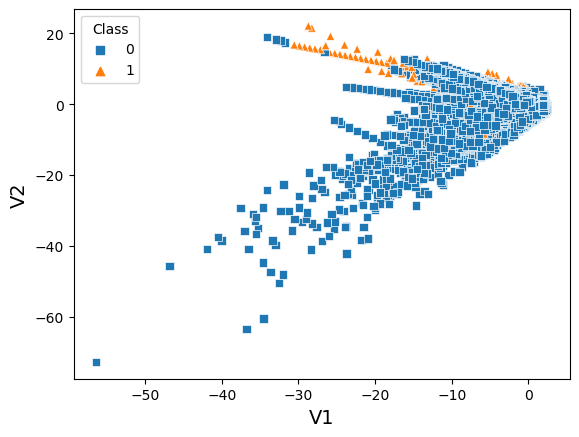

In [3]:
# Define input and output features
X = CC[['V1','V2']]
y = CC[['Class']]

# Scatterplot of the credit card data
p = sns.scatterplot(data=CC, x='V1', y='V2',
                    hue='Class', style='Class', markers=['s', '^'])
p.set_xlabel('V1', fontsize=14)
p.set_ylabel('V2', fontsize=14)

In [4]:
# Initialize a model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
knnypred = knn.predict(X)

In [5]:
# Initialize a logistic regression model
lrm = LogisticRegression(penalty=None)

# Fit the model
lrm.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
lrmypred = lrm.predict(X)

In [6]:
# Initialize a Gaussian naive Bayes model
GNBm = GaussianNB()

# Fit the model
GNBm.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
GNBypred = GNBm.predict(X)

/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Gaussian naive Bayes')

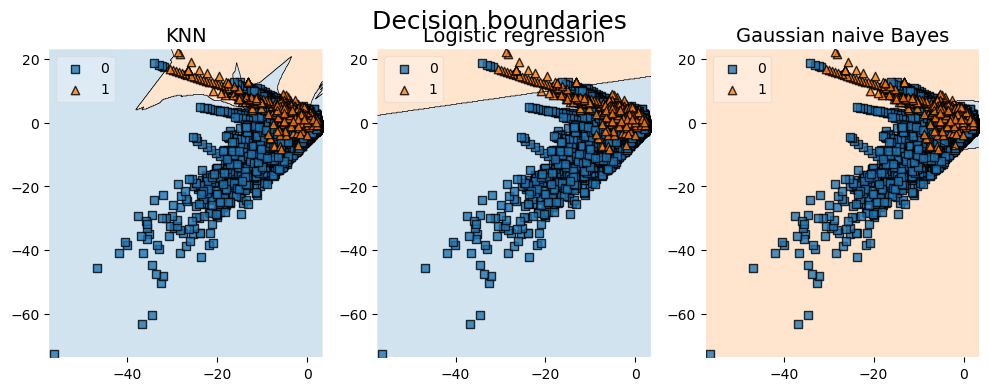

In [7]:
# Plot the decision boundaries
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Decision boundaries', fontsize=18);

# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

plot_decision_regions(X.to_numpy(), np.ravel(y), clf=knn, contourf_kwargs=contourf_kwargs, ax=ax[0], legend=2)
ax[0].set_title('KNN', fontsize=14)
plot_decision_regions(X.to_numpy(), np.ravel(y), clf=lrm, contourf_kwargs=contourf_kwargs, ax=ax[1], legend=2)
ax[1].set_title('Logistic regression', fontsize=14)
plot_decision_regions(X.to_numpy(), np.ravel(y), clf=GNBm, contourf_kwargs=contourf_kwargs, ax=ax[2], legend=2)
ax[2].set_title('Gaussian naive Bayes', fontsize=14)

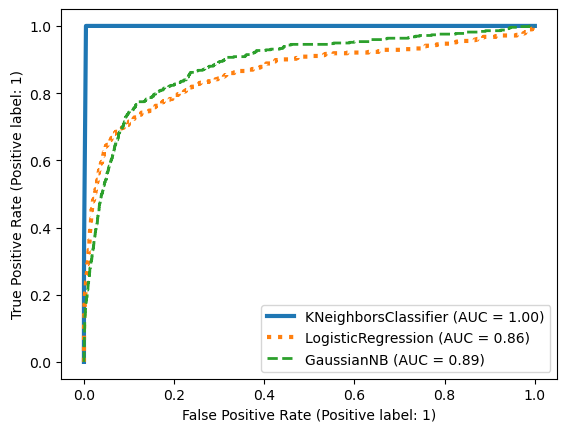

In [8]:
# Plot the ROC curves
knn_plot = RocCurveDisplay.from_estimator(knn, X, y, linewidth=3)
lrm_plot = RocCurveDisplay.from_estimator(lrm, X, y, ax=knn_plot.ax_, linewidth=3, linestyle='dotted')
gnbm_plot = RocCurveDisplay.from_estimator(GNBm, X, y, ax=knn_plot.ax_, linewidth=2, linestyle='dashed')